<a href="https://colab.research.google.com/github/Allen0429/AI_Launch/blob/main/CSC420_A3_Q4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from matplotlib import quiver
import matplotlib.pyplot as plt
import numpy as np
import math

!pip install opencv-python
import cv2

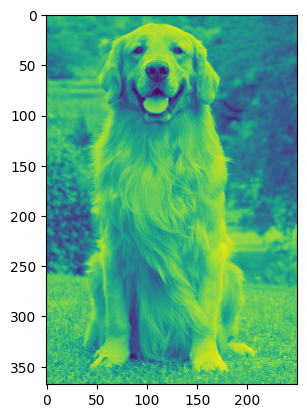

In [3]:
img = cv2.imread('/content/drive/My Drive/CSC420/A3/3.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img)

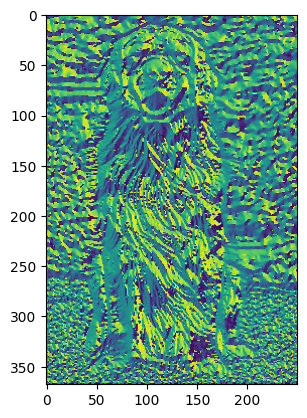

In [4]:
def compute_gradient(img):
    gradient_x = cv2.Sobel(img, cv2.CV_32F, 1, 0)
    gradient_y = cv2.Sobel(img, cv2.CV_32F, 0, 1)
    magnitude, direction = cv2.cartToPolar(gradient_x, gradient_y, angleInDegrees=True)

    threshold = 10

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if magnitude[i][j] < threshold:
                magnitude[i][j] = 0

    return magnitude, direction

magnitude, direction = compute_gradient(img)
plt.imshow(direction)

In [5]:
tau = 5
m = img.shape[0] // tau
n = img.shape[1] // tau
print(m)
print(n)

73
50


In [6]:
def construct_HOG(magnitude, direction, m, n, tau):

    HOG = np.zeros((m, n, 6))
    HOG_1 = np.zeros((m, n, 6))

    for i in range(m * tau):
        for j in range(n * tau):
            HOG_i = i // tau
            HOG_j = j // tau

            d = direction[i][j]
            if (345 <= d or 0 <= d < 15 or 165 <= d < 195) and magnitude[i][j] != 0:
                HOG[HOG_i][HOG_j][0] += 1
                HOG_1[HOG_i][HOG_j][0] += magnitude[i][j]

            elif (15 <= d < 45 or 195 <= d < 225) and magnitude[i][j] != 0:
                HOG[HOG_i][HOG_j][1] += 1
                HOG_1[HOG_i][HOG_j][1] += magnitude[i][j]

            elif (45 <= d < 75 or 225 <= d < 255) and magnitude[i][j] != 0:
                HOG[HOG_i][HOG_j][2] += 1
                HOG_1[HOG_i][HOG_j][2] += magnitude[i][j]

            elif (75 <= d < 105 or 255 <= d < 285) and magnitude[i][j] != 0:
                HOG[HOG_i][HOG_j][3] += 1
                HOG_1[HOG_i][HOG_j][3] += magnitude[i][j]

            elif (105 <= d < 135 or 285 <= d < 315) and magnitude[i][j] != 0:
                HOG[HOG_i][HOG_j][4] += 1
                HOG_1[HOG_i][HOG_j][4] += magnitude[i][j]

            elif (135 <= d < 165 or 315 <= d < 345) and magnitude[i][j] != 0:
                HOG[HOG_i][HOG_j][5] += 1
                HOG_1[HOG_i][HOG_j][5] += magnitude[i][j]

    return HOG, HOG_1


HOG, HOG_1 = construct_HOG(magnitude, direction, m, n, tau)

In [7]:
def plot_HOG(img, HOG):

    all_x = np.zeros((m, n))
    all_y = np.zeros((m, n))

    for i in range(m):
        for j in range(n):
            x = j * tau + (tau // 2)
            y = i * tau + (tau // 2)
            all_x[i][j] = x
            all_y[i][j] = y

    theta = 0
    edge = HOG[:, :, 0]
    u = np.sin(theta) * edge
    v = np.cos(theta) * edge
    plt.quiver(all_x, all_y, u, v, color='red', pivot='middle')

    theta = np.pi / 6
    edge = HOG[:, :, 1]
    u = np.sin(theta) * edge
    v = np.cos(theta) * edge
    plt.quiver(all_x, all_y, u, v, color='red', pivot='middle')

    theta = np.pi / 3
    edge = HOG[:, :, 2]
    u = np.sin(theta) * edge
    v = np.cos(theta) * edge
    plt.quiver(all_x, all_y, u, v, color='red', pivot='middle')

    theta = np.pi / 2
    edge = HOG[:, :, 3]
    u = np.sin(theta) * edge
    v = np.cos(theta) * edge
    plt.quiver(all_x, all_y, u, v, color='red', pivot='middle')

    theta = (np.pi * 2) / 3
    edge = HOG[:, :, 4]
    u = np.sin(theta) * edge
    v = np.cos(theta) * edge
    plt.quiver(all_x, all_y, u, v, color='red', pivot='middle')

    theta = (np.pi * 5) / 6
    edge = HOG[:, :, 5]
    u = np.sin(theta) * edge
    v = np.cos(theta) * edge
    plt.quiver(all_x, all_y, u, v, color='red', pivot='middle')

    plt.imshow(img, cmap='gray')
    plt.show()

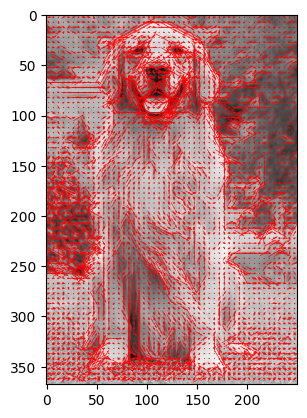

In [8]:
plot_HOG(img, HOG_1)

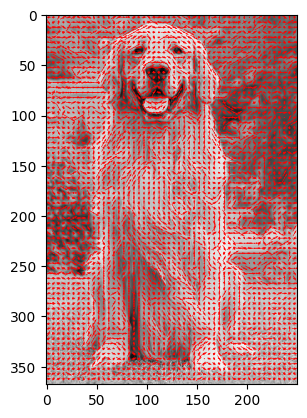

In [9]:
plot_HOG(img, HOG)

In [10]:
print(HOG.shape)

(73, 50, 6)


In [11]:
def variant_HOG(HOG):

    new_HOG = np.zeros((m-1, n-1, 24))

    for i in range(HOG.shape[0] - 1):
        for j in range(HOG.shape[1] - 1):

            cur_descriptor = np.concatenate((HOG[i][j], HOG[i][j+1], HOG[i+1][j], HOG[i+1][j+1]), axis=None)

            for k in range(24):

                sum_square = 0
                for l in range(24):
                    sum_square += cur_descriptor[l] ** 2

                cur_descriptor[k] = cur_descriptor[k] / math.sqrt(sum_square + 0.001 ** 2)

            new_HOG[i][j] = cur_descriptor

    return new_HOG


new_HOG = variant_HOG(HOG)
# print(new_HOG)

In [12]:
def write_into_file(new_HOG):

    new_HOG = new_HOG.tolist()

    with open('image1.txt', 'w') as f:
        for line in new_HOG:
            f.write(f'{line}\n')


write_into_file(new_HOG)

In [13]:
def update_HOG(HOG):
    new_value = np.zeros((HOG.shape[0], HOG.shape[1], 6))
    for i in range(HOG.shape[0]):
        for j in range(HOG.shape[1]):
            h = HOG[i][j]
            for k in range(0, 24, 6):
                new_value[i][j][0] += h[k]
            for k in range(1, 24, 6):
                new_value[i][j][1] += h[k]
            for k in range(2, 24, 6):
                new_value[i][j][2] += h[k]
            for k in range(3, 24, 6):
                new_value[i][j][3] += h[k]
            for k in range(4, 24, 6):
                new_value[i][j][4] += h[k]
            for k in range(5, 24, 6):
                new_value[i][j][5] += h[k]

    new_value = new_value / 6

    return new_value

new_HOG = update_HOG(new_HOG)

In [14]:
def plot_variant_HOG(img, new_HOG):

    img = img.astype('float') / 255.0
    plt.imshow(img, cmap='gray', vmin=0, vmax=1)

    all_x = np.zeros((m-1, n-1))
    all_y = np.zeros((m-1, n-1))

    for i in range(m-1):
        for j in range(n-1):
            x = j * tau + (tau // 2)
            y = i * tau + (tau // 2)
            all_x[i][j] = x
            all_y[i][j] = y

    theta = 0
    edge = new_HOG[:, :, 0]
    u = np.sin(theta) * edge
    v = np.cos(theta) * edge
    plt.quiver(all_x, all_y, u, v, color='red', pivot='middle')

    theta = np.pi / 6
    edge = new_HOG[:, :, 1]
    u = np.sin(theta) * edge
    v = np.cos(theta) * edge
    plt.quiver(all_x, all_y, u, v, color='red', pivot='middle')

    theta = np.pi / 3
    edge = new_HOG[:, :, 2]
    u = np.sin(theta) * edge
    v = np.cos(theta) * edge
    plt.quiver(all_x, all_y, u, v, color='red', pivot='middle')

    theta = np.pi / 2
    edge = new_HOG[:, :, 3]
    u = np.sin(theta) * edge
    v = np.cos(theta) * edge
    plt.quiver(all_x, all_y, u, v, color='red', pivot='middle')

    theta = (np.pi * 2) / 3
    edge = new_HOG[:, :, 4]
    u = np.sin(theta) * edge
    v = np.cos(theta) * edge
    plt.quiver(all_x, all_y, u, v, color='red', pivot='middle')

    theta = (np.pi * 5) / 6
    edge = new_HOG[:, :, 5]
    u = np.sin(theta) * edge
    v = np.cos(theta) * edge
    plt.quiver(all_x, all_y, u, v, color='red', pivot='middle')

    plt.imshow(img, cmap='gray')
    plt.show()


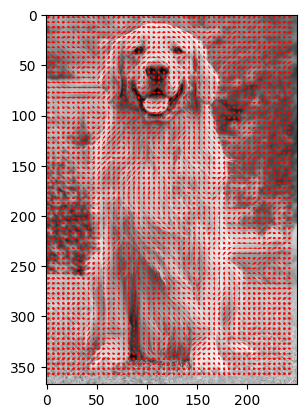

In [15]:
plot_variant_HOG(img, new_HOG)